
# Exercici 1

### Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

### També adjunt trobaràs una descripció de les diferents variables del dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv('housing data.csv', sep=',', names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
                                                       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Informació d'atributs:

1. **CRIM**: Taxa de delinqüència per càpita per municipis.
2. **ZN**: Proporció de sòl residencial zonificat per a solars superiors 25.000 peus quadrats.
3. **INDUS**: Proporció d'hectàrees comercials no minoristes per ciutat.
4. **CHAS**: Variable dummy de Charles River (= 1 si limita amb el riu; 0 en cas contrari).
5. **NOX**: Concentració d'òxids nítrics (parts per 10 milions).
6. **RM**: Nombre mitjà d'habitacions per habitatge.
7. **AGE**: Proporció de les unitats ocupades pel propietari construïdes abans de 1940.
8. **DIS**: Distàncies ponderades fins a cinc centres d'ocupació de Boston.
9. **RAD**: Índex d'accessibilitat a les carreteres radials.
10. **TAX**: Valor total de l'impost sobre la propietat per 10.000$.
11. **PTRATIO**: Ràtio alumnes-professor per municipis.
12. **B**: 1000(Bk - 0,63)^2 on Bk és la proporció de negres per municipi.
13. **LSTAT**: % d'estatus inferior de la població.
14. **MEDV**: Valor mitjà de les cases ocupades pel propietari en 1.000 dòlars.
     
***Opinió personal: l'atribut 12 és indignant.***

In [2]:
#Comprovem que no hi hagi valors nulls
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<Axes: >

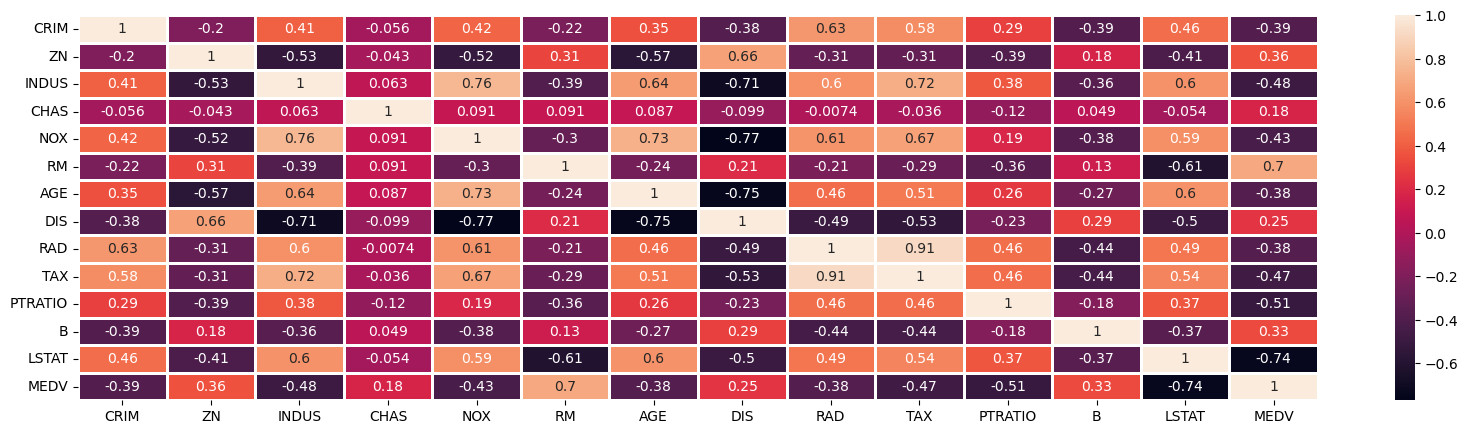

In [3]:
#Busquem les columnes que tenen més correlació amb el preu per tal d'eliminar les que en tenen poca

plt.figure(figsize=(20, 5))

sns.heatmap(df.corr(), linewidths=1, linecolor='white', annot=True)

El valor que volem predir (target) és el 'MEDV' (preu). Com podem veure, les variables que tenen més correlació amb el preu -ja sigui positiva o negativa- amb molta diferència són LSTAT (% d'estatus inferior de la població) i RM (Nombre mitjà d'habitacions per habitatge). Les altres variables queden lluny en quant a correlació. Ens quedarem només amb les columnes amb correlació forta.

In [4]:
df = df.loc[:,['LSTAT', 'RM', 'MEDV']]

#Canviem de nom les columnes 'LSTAT', 'RM' i 'MEDV'

df.rename(columns={'LSTAT':'%ClasseBaixa', 'RM':'Habitacions', 'MEDV':'Preu'}, inplace=True)
df

,%ClasseBaixa,Habitacions,Preu
0,4.98,6.575,24.0
1,9.14,6.421,21.6
2,4.03,7.185,34.7
3,2.94,6.998,33.4
4,5.33,7.147,36.2
...,...,...,...
501,9.67,6.593,22.4
502,9.08,6.120,20.6
503,5.64,6.976,23.9
504,6.48,6.794,22.0


Comprobem si hi ha outliers.

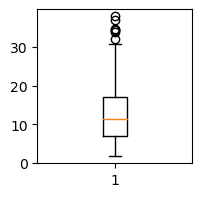

In [5]:
fig, ax = plt.subplots(figsize=(2, 2))
ax.boxplot(df['%ClasseBaixa'])
plt.show()

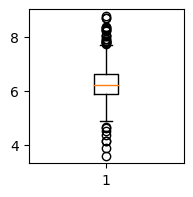

In [6]:
fig, ax = plt.subplots(figsize=(2, 2))
ax.boxplot(df['Habitacions'])
plt.show()

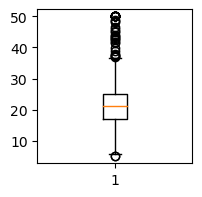

In [7]:
fig, ax = plt.subplots(figsize=(2, 2))
ax.boxplot(df['Preu'])
plt.show()

In [8]:
#Eliminem els outliers de cada columna

from scipy import stats

df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

df = df.reset_index(drop=True)

df

,%ClasseBaixa,Habitacions,Preu
0,4.98,6.575,24.0
1,9.14,6.421,21.6
2,4.03,7.185,34.7
3,2.94,6.998,33.4
4,5.33,7.147,36.2
...,...,...,...
489,9.67,6.593,22.4
490,9.08,6.120,20.6
491,5.64,6.976,23.9
492,6.48,6.794,22.0


Si ens fixem en els preus, estàn desactualitzats, ja que la base de dades és de 1978. Segons dades oficials, el preu promig al març 2023 d'una casa a Boston era de 830,000$, per tant calcularem quantes vegades ha augmentat el valor des de 1978 fins ara.

In [9]:
#Calculem la mitjana i apliquem la revalorització a cada valor

preu_actual = 830 #ja que la unitat son milers

mitjana_preus = df['Preu'].mean()

increment = preu_actual/mitjana_preus

df.loc[:, 'Preu'] = (df['Preu'] * increment)

df

,%ClasseBaixa,Habitacions,Preu
0,4.98,6.575,886.409945
1,9.14,6.421,797.768950
2,4.03,7.185,1281.601045
3,2.94,6.998,1233.587173
4,5.33,7.147,1337.001666
...,...,...,...
489,9.67,6.593,827.315948
490,9.08,6.120,760.835202
491,5.64,6.976,882.716570
492,6.48,6.794,812.542449


In [10]:
from sklearn.model_selection import train_test_split

X = df.drop('Preu', axis=1)
y = df['Preu'] # Variable objectiu

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

print('\nAnàlisi descriptiu del conjunt d\'entrenament \n')
print(X_train.describe().astype(int))

print('\nAnàlisi descriptiu del target del conjunt d\'entrenament \n')
print(y_train.describe().astype(int))

print('\nAnàlisi descriptiu del conjunt de test\n')
print(X_test.describe().astype(int))

print('\nAnàlisi descriptiu del target del conjunt de test\n')
print(y_test.describe().astype(int))


Anàlisi descriptiu del conjunt d'entrenament 

       %ClasseBaixa  Habitacions
count           395          395
mean             12            6
std               6            0
min               1            4
25%               7            5
50%              11            6
75%              16            6
max              31            8

Anàlisi descriptiu del target del conjunt d'entrenament 

count     395
mean      828
std       327
min       184
25%       640
50%       782
75%       923
max      1846
Name: Preu, dtype: int32

Anàlisi descriptiu del conjunt de test

       %ClasseBaixa  Habitacions
count            99           99
mean             12            6
std               7            0
min               2            5
25%               7            5
50%              12            6
75%              16            6
max              34            8

Anàlisi descriptiu del target del conjunt de test

count      99
mean      834
std       351
min       184
25%       585

# Exercici 2

### Aplica algun procés de transformació (estandaritzar les dades numèriques, crear columnes dummies, polinomis...).

In [11]:
#Estandarització

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)

print(df_scaled)

[[-1.10457433  0.44286235  0.16995431]
 [-0.49092491  0.19766428 -0.09710709]
 [-1.24471061  1.41410149  1.36060305]
 ...
 [-1.00721649  1.08133267  0.15882675]
 [-0.88330651  0.79155313 -0.05259686]
 [-0.67678988 -0.42488408 -1.17648025]]


In [12]:
#Polinomis

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
df_poly = poly_features.fit_transform(df_scaled)

df_poly

array([[-1.10457433,  0.44286235,  0.16995431, -0.48917439, -0.18772716,
         0.07526636],
       [-0.49092491,  0.19766428, -0.09710709, -0.09703832,  0.04767229,
        -0.0191946 ],
       [-1.24471061,  1.41410149,  1.36060305, -1.76014713, -1.69355705,
         1.9240308 ],
       ...,
       [-1.00721649,  1.08133267,  0.15882675, -1.08913609, -0.15997292,
         0.17174455],
       [-0.88330651,  0.79155313, -0.05259686, -0.69918403,  0.04645915,
        -0.04163321],
       [-0.67678988, -0.42488408, -1.17648025,  0.28755725,  0.79622992,
         0.49986773]])

# Exercici 3

### Resumeix les noves columnes generades de manera estadística i gràfica.

In [16]:
df.describe().round(2)

,%ClasseBaixa,Habitacions,Preu
count,494.00,494.00,494.00
mean,12.47,6.30,830.00
std,6.79,0.63,332.25
min,1.73,4.37,184.67
25%,7.04,5.89,631.57
50%,11.33,6.21,783.00
75%,16.72,6.62,923.34
max,34.02,8.38,1846.69


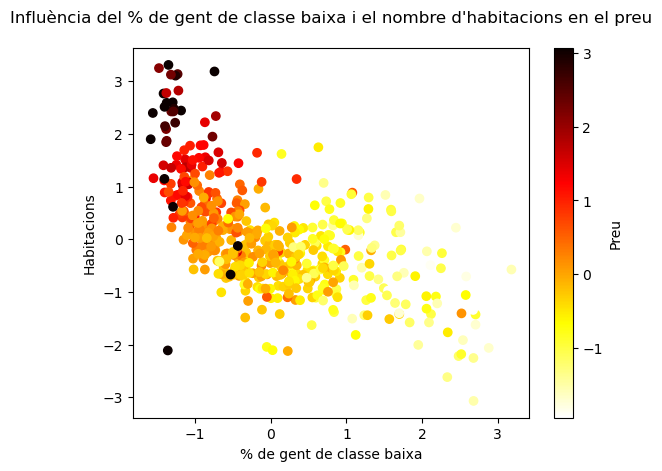

In [14]:
ClasseBaixa = df_poly[:, 0]
Habitacions = df_poly[:, 1]
Preu = df_poly[:, 2]

plt.scatter(ClasseBaixa, Habitacions, c=Preu, cmap='hot_r')
plt.xlabel('% de gent de classe baixa')
plt.ylabel('Habitacions')
plt.title('Influència del % de gent de classe baixa i el nombre d\'habitacions en el preu\n')
cbar = plt.colorbar()
cbar.set_label('Preu')
plt.show()